# Support Vector Machines
        - a powerfull classifier that works both on linearly and non-linearly separable data.
        - finds a optimal hyperplane that best separates the data so that the distance between the nearest 
          point and itself is maximized.
        - the nearest points are known as support vectors.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Data Generation

In [6]:
from sklearn.datasets import make_classification

In [7]:
X,Y = make_classification(n_samples = 400,n_features = 2,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=3)
print(X.shape)

(400, 2)


In [8]:
#convert y-labels into {1,-1}
Y[Y==0] = -1
print(Y[:10])

[-1  1 -1  1 -1  1  1 -1 -1  1]


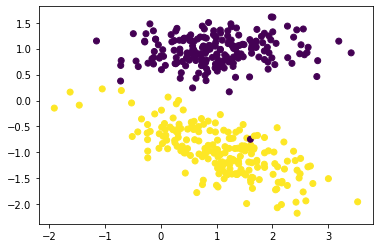

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

## Goal 
    -Our goal is to maximize the minimum distance between the support vectors and the hyperplane((W.T)*X + b = 0).
     But this SVM Loss function is a non-convex function which is difficult to differentiate.
     
    -We can renormalize our dataset such that the support vectors lie on the positive hyperplane((W.T)*X + b = 1)
     and negative hyperplane((W.T)*X + b = -1).By doing so we will get a convex formulation with a linear constraint 
     i.e. 
             minimize((||W||) 
             such that for all data points (W.T)*X + b > 1 (distance of a data points from hyperplane).
     
     -we can handle the outliers by allowing our algorithm to make some error which is given by 1-((W.T)*X + b) and is >=0.
      now our goal is to minimize(||W||**2 + C*sigma(E)) given(Y[i]*((W.T)*X + b) >= 1-E) where E is the error.
     
     -we can convert the above convex linearly constrainted formulation into unconstrained convex formulation by using 
      the pegasos approach and the resultant loss function is given by
              Loss => ( ||W||**2 + C*sigma( max(0,1-t[i]) ) )  where t = Y[i]((W.T)*X[i] + b)
              
     -On differentiating the loss function with respest to W and b we get:
             gradient(W) = W + C*sigma(X[i]Y[i]*( 0 if t[i]>=1 OR -1 if t[i]<1))
             gradient(B) = C*sigma(Y[i]*( 0 if t[i]>=1 OR -1 if t[i]<1))

In [102]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    
    def hingeLoss(self,W,b,X,Y):
        loss = 0.5*np.dot(W,W.T)
        
        k = X.shape[0]
        for i in range(k):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,1-ti)
        return loss[0][0]
    def fit(self,X,Y,batch_size = 100,learningRate = 0.001,maxitr = 1000):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learningRate
        C = self.C
        
        W = np.zeros((1,no_of_features))
        bias = 0
        #print(self.hingeLoss(W,bias,X,Y))
        
        losses = []
        #training our model
        
        for i in range(maxitr):
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            #batch gradient Descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #assume grad as 0 at start
                gradw = 0
                gradb = 0
                #iterate on all samples in mini-batch
                for j in range(batch_start,batch_start+batch_size):
                    if j < no_of_samples :
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                    
                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += C*X[i]*Y[i]
                            gradb += C*Y[i]
                #gradient for the batch is ready update W,bias
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        self.W = W
        self.b = bias
        return W,bias,losses   
    def predict(self,x,W,b):
        p = np.dot(W,x.T)+b
        if p > 0:
            return +1
        else:
            return -1
    def accuracy(self,X,Y,final_W,final_b):
        count = 0
        for i in range(X.shape[0]):
            z = svm.predict(X[i],final_W,final_b)
            if z == Y[i]:
                count+=1
        return count/X.shape[0]  

In [103]:
svm = SVM()

In [104]:
final_W,final_b,losses = svm.fit(X,Y)
print(final_W,final_b)
print(losses[0],losses[-1])

[[-0.35066554 -2.0920553 ]] 0.42000000000000026
400.0 14.506088285331613


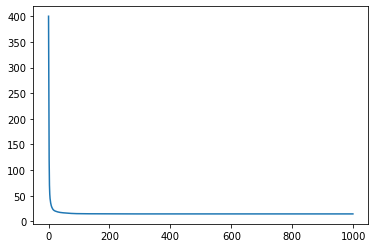

In [105]:
plt.plot(losses)
plt.show()

In [106]:
def plot_hyperplane(w1,w2,b):
    x1 = np.linspace(-2,5,10)
    x2 = -(w1*x1 + b)/w2      #hyperplane => WT * X + b = 0
    x3 = -(w1*x1 + b + 1)/w2  #negative hyperplane => WT * X + b = -1
    x4 = -(w1*x1 + b - 1)/w2  #positive hyperplane => WT * X + b = 1
    plt.figure(figsize=[12,8])
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.plot(x1,x2,label = "hyperplane")
    plt.plot(x1,x3,label = "negative hyperplane",ls = "--")
    plt.plot(x1,x4,label = "positive hyperplane",ls = "--")
    plt.legend()
    plt.show()

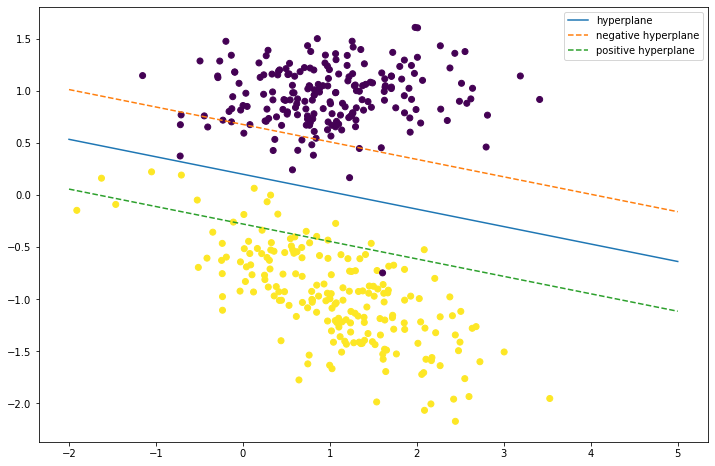

In [107]:
plot_hyperplane(final_W[0][0],final_W[0][1],final_b)

In [110]:
print(svm.predict(X[0],final_W,final_b))

-1


In [111]:
print(accuracy(X,Y,final_W,final_b))

0.9975
